# **E-Commerce Dataset EDA**

<div class="alert alert-success">  
<h3><strong>Imports</strong></h3>
</div>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
# from pandas_profiling import ProfileReport
from pandas.plotting import parallel_coordinates
from IPython.display import display, Markdown
# import datasist as ds

# for providing path


import os
# print(os.listdir("../input"))

# for modelling

import sklearn
import imblearn

# set seaborn styles
sns.set(style="whitegrid")

In [ ]:
df = pd.read_excel('/content/(DSP 2) dataset-ecommerce_Farah.xlsx')

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,140,2,0.05,...,4.6,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,211,3,0.03,...,11.2,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,...,3.1,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,...,2.6,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,250,1,0.04,...,16,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51303 non-null  object        
 1   order_date        51303 non-null  datetime64[ns]
 2   ship_date         51303 non-null  datetime64[ns]
 3   aging             51302 non-null  float64       
 4   ship_mode         51303 non-null  object        
 5   product_category  51303 non-null  object        
 6   product           51303 non-null  object        
 7   sales             51303 non-null  object        
 8   quantity          51302 non-null  object        
 9   discount          51303 non-null  object        
 10  profit            51303 non-null  float64       
 11  shipping_cost     51303 non-null  object        
 12  order_priority    51301 non-null  object        
 13  customer_id       51302 non-null  object        
 14  customer_name     5130

<div class="alert alert-success">  
<h3><strong>Simple Statistic Data</strong></h3>
</div>

In [ ]:
df.describe()

,aging,profit
count,51302.000000,51303.000000
mean,5.254971,72.713900
std,2.959576,49.096551
min,1.000000,0.500000
25%,3.000000,25.700000
50%,5.000000,67.000000
75%,8.000000,120.600000
max,10.500000,167.500000


In [ ]:
def describe_detail(df):
    # Display function with Markdown for titles
    def display_markdown(title):
        display(Markdown(f"**{title}**"))

    # (a) First five data points
    display_markdown('First five data points')
    display(df.head())

    # (b) Random five data points
    display_markdown('Random five data points')
    display(df.sample(5))

    # (c) Last five data points
    display_markdown('Last five data points')
    display(df.tail())

    # (d) Shape and Size of data set
    shape_size_df = pd.DataFrame({'Shape': [df.shape], 'Size': [df.size]})
    display_markdown('Shape and Size of dataset')
    display(shape_size_df)

    # (e) Data types
    data_types_df = pd.DataFrame(df.dtypes, columns=['Data Type'])
    display_markdown('Data types of columns')
    display(data_types_df)

    # (f) Numerical features in the dataset
    display_markdown('Numerical features in the dataset')
    display(df.select_dtypes(include=[np.number]).columns.tolist())

    # (g) Categorical features in the dataset
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    display_markdown('Categorical features in the dataset')
    display(categorical_features)

    # (h) Statistical Description of Columns
    display_markdown('Statistical Description of Numerical Columns')
    display(df.describe())

    # (i) Description of Categorical features
    display_markdown('Description of Categorical Features')
    display(df.describe(include=['object', 'category']))

    # (j) Unique class count of Categorical features
    unique_counts_df = pd.DataFrame(df[categorical_features].nunique(), columns=['Unique Count'])
    display_markdown('Unique class count of Categorical features')
    display(unique_counts_df)

    # (k) Missing values in data
    missing_values_df = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
    missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]
    display_markdown('Missing values in data')
    display(missing_values_df)

# Assuming 'df' is your DataFrame
describe_detail(df)

**First five data points**

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,140,2,0.05,...,4.6,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,211,3,0.03,...,11.2,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,...,3.1,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,...,2.6,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,250,1,0.04,...,16,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


**Random five data points**

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
19065,HF-2015-8860,2015-08-25,2015-08-26,1.0,Second Class,Home & Furniture,Sofa Covers,216,1,0.05,...,12.5,Medium,RF-0049841,Mejia Waldorf,Corporate,Kaunas,Kaunas,Lithuania,EMEA,Aug
32950,FA-2015-12436,2015-09-06,2015-09-14,8.0,Standard Class,Fashion,Casula Shoes,122,3,0.04,...,2.7,Medium,LL-0022642,Cole Campbell,Consumer,Tehuacán,Puebla,Mexico,North,Sep
25999,FA-2015-5485,2015-03-14,2015-03-23,9.0,Standard Class,Fashion,Running Shoes,224,5,0.04,...,9.9,High,ER-0015691,Rich Ratner,Consumer,Lucknow,Uttar Pradesh,India,Central Asia,Mar
32147,FA-2015-11633,2015-10-16,2015-10-21,5.0,Standard Class,Fashion,Casula Shoes,122,5,0.03,...,2.4,Medium,TT-0021839,Fuller Eplett,Corporate,Philadelphia,Pennsylvania,United States,East,Oct
23359,FA-2015-2845,2015-05-27,2015-06-01,5.0,Standard Class,Fashion,Running Shoes,224,3,0.04,...,11.7,High,AN-0013051,Buckley Wasserman,Corporate,Severodvinsk,Arkhangel'sk,Russia,EMEA,May


**Last five data points**

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
51298,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51299,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51300,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51301,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51302,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


**Shape and Size of dataset**

,Shape,Size
0,"(51303, 21)",1077363


**Data types of columns**

,Data Type
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
aging,float64
ship_mode,object
product_category,object
product,object
sales,object
quantity,object
discount,object


**Numerical features in the dataset**

['aging', 'profit']

**Categorical features in the dataset**

['order_id',
 'ship_mode',
 'product_category',
 'product',
 'sales',
 'quantity',
 'discount',
 'shipping_cost',
 'order_priority',
 'customer_id',
 'customer_name',
 'segment',
 'city',
 'state',
 'country',
 'region',
 'months']

**Statistical Description of Numerical Columns**

,aging,profit
count,51302.000000,51303.000000
mean,5.254971,72.713900
std,2.959576,49.096551
min,1.000000,0.500000
25%,3.000000,25.700000
50%,5.000000,67.000000
75%,8.000000,120.600000
max,10.500000,167.500000


**Description of Categorical Features**

,order_id,ship_mode,product_category,product,sales,quantity,discount,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
count,51303,51303,51303,51303,51303,51302,51303.00,51303.0,51301,51302,51303,51302,51303,51303,51303,51302,51303
unique,51294,4,4,42,40,6,6.00,154.0,4,51289,795,3,3636,1094,147,13,12
top,FA-2015-30775,Standard Class,Fashion,Sports Wear,228,3,0.03,2.1,Medium,RZ-0040981,Mcclain O'Donnell,Consumer,New York City,California,United States,Central,Jul
freq,10,30788,30788,2840,3823,10320,10372.00,1225.0,29446,14,108,26518,915,2001,9994,11117,4445


**Unique class count of Categorical features**

,Unique Count
order_id,51294
ship_mode,4
product_category,4
product,42
sales,40
quantity,6
discount,6
shipping_cost,154
order_priority,4
customer_id,51289


**Missing values in data**

,Missing Values
aging,1
quantity,1
order_priority,2
customer_id,1
segment,1
region,1


<div class="alert alert-success">  
<h3><strong>Missing Values Info</strong></h3>
</div>

In [ ]:
def display_missing(data):
  total_missing = data.isnull().sum()
  percent_missing = (data.isnull().sum() / data.shape[0]*100)
  missing_data = pd.DataFrame({'Total Missing': total_missing,
                               'Percent Missing': percent_missing})
  missing_data = missing_data[missing_data['Total Missing'] > 0]
  missing_data = missing_data.sort_values(by='Total Missing',
                                          ascending=False)

  return missing_data

missing_data = display_missing(df)
missing_data

,Total Missing,Percent Missing
order_priority,2,0.003898
aging,1,0.001949
quantity,1,0.001949
customer_id,1,0.001949
segment,1,0.001949
region,1,0.001949


In [ ]:
# Bagi missing values fill categorical --> Modus, Numerical --> Mean
categorical_columns = df.select_dtypes(include=['object','category']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Loop untuk fill missing values
for col in categorical_columns:
  df[col].fillna(df[col].mode()[0], inplace=True)

for col in numerical_columns:
  df[col].fillna(df[col].mean(), inplace=True)

missing_data = display_missing(df)
missing_data

,Total Missing,Percent Missing


## **Delete Dollar Sign from Sales, Profit, and Shipping Cost**

In [ ]:
df.loc[535,:]

order_id                    AU-2015-536
order_date          2015-03-21 00:00:00
ship_date           2015-03-24 00:00:00
aging                               3.0
ship_mode                   First Class
product_category     Auto & Accessories
product                            Tyre
sales                               250
quantity                              4
discount                           0.02
profit                            150.0
shipping_cost                      test
order_priority                 Critical
customer_id                    ON-00536
customer_name            Webster Jordon
segment                        Consumer
city                            Guiyang
state                           Guizhou
country                           China
region                       North Asia
months                              Mar
Name: 535, dtype: object

In [ ]:
df['sales'] = df['sales'].astype(str).str.replace('[^\d,]','', regex =True).astype(float)
df['profit'] = df['profit'].astype(str).str.replace('[^\d,]','', regex=True).astype(float)
df.drop(df.index[535], inplace=True)
df['shipping_cost'] = df['shipping_cost'].astype(str).str.replace('[^\d,]','', regex =True).astype(float)
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,140.0,2,0.05,...,46.0,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,211.0,3,0.03,...,112.0,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,117.0,5,0.01,...,31.0,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,118.0,2,0.05,...,26.0,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,250.0,1,0.04,...,16.0,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


## **Visualisasi**

## Ship Mode Analyze

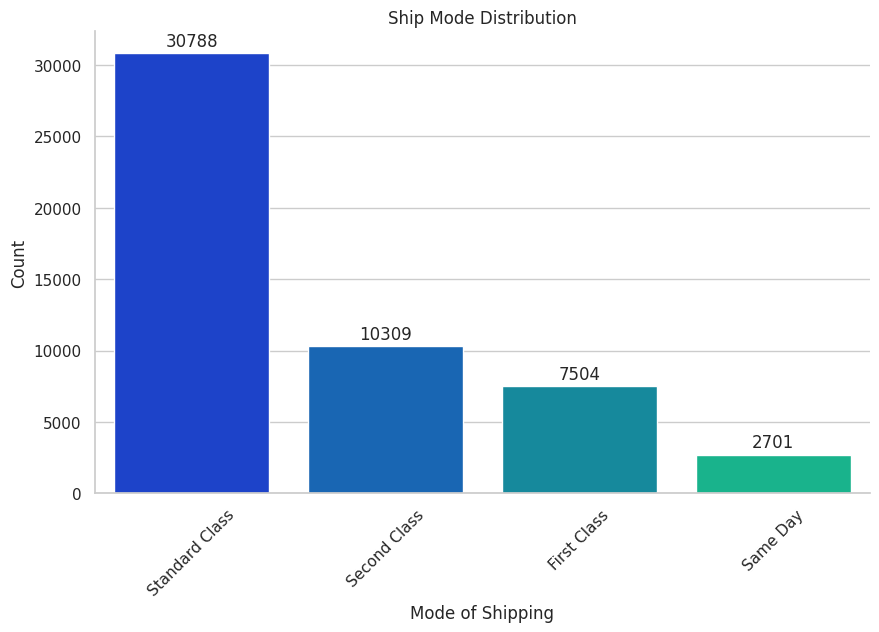

In [ ]:
df_ship_mode = df['ship_mode'].value_counts().reset_index()
df_ship_mode.columns = ['ship_mode', 'count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_ship_mode, x='ship_mode', y='count', palette="winter")

ax.set_title('Ship Mode Distribution')
ax.set_xlabel('Mode of Shipping')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xticks(rotation=45)
sns.despine()

plt.show()

<div class="alert alert-info">
  <p>

*     Standard Class Shipping is the most popular among other shipping methods. This kind of behavior may occur because most customers choose standard shipping rather than having to pay more
  </p>
</div>

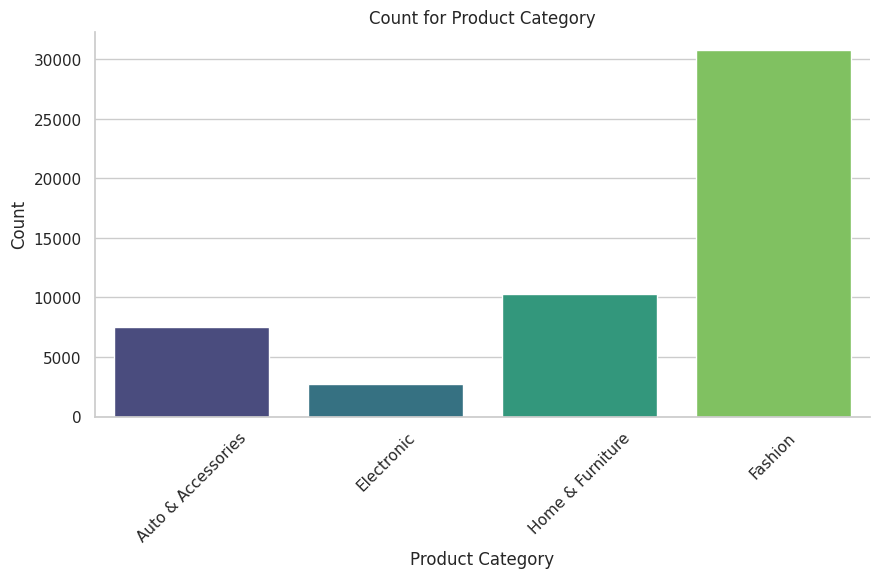

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='product_category', data=df, palette='viridis')

ax.set_title('Count for Product Category')

plt.xticks(rotation=45)
ax.set_xlabel('Product Category')
ax.set_ylabel('Count')

sns.despine()

plt.show()

<div class="alert alert-info">
<p>


*   In terms of Product Category, Fashion is the product category that is most popular with customers


</p>

</div>

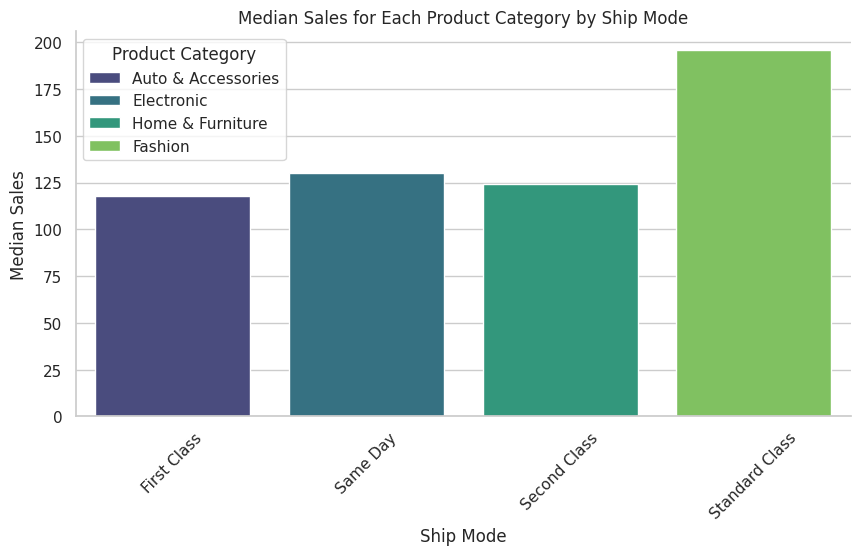

In [ ]:
median_sales = df.groupby(['ship_mode', 'product_category'])['sales'].median().reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='ship_mode', y='sales', hue='product_category', data=median_sales, palette='viridis')

ax.set_title('Median Sales for Each Product Category by Ship Mode')
ax.set_xlabel('Ship Mode')
ax.set_ylabel('Median Sales')

plt.legend(title='Product Category')

plt.xticks(rotation=45)

sns.despine()

plt.show()

<div class="alert alert-info">
<p>

*   Standard class is a delivery method that generates more
sales than other methods, this is because many customers order fashion category products using this method.
According to my assumption, fashion is a low ticket product which makes people do not want to pay more for shipping only for goods that tend to be cheap, it is rare for people to pay shipping costs that are more expensive than the price of the goods purchased
</p>



</div>

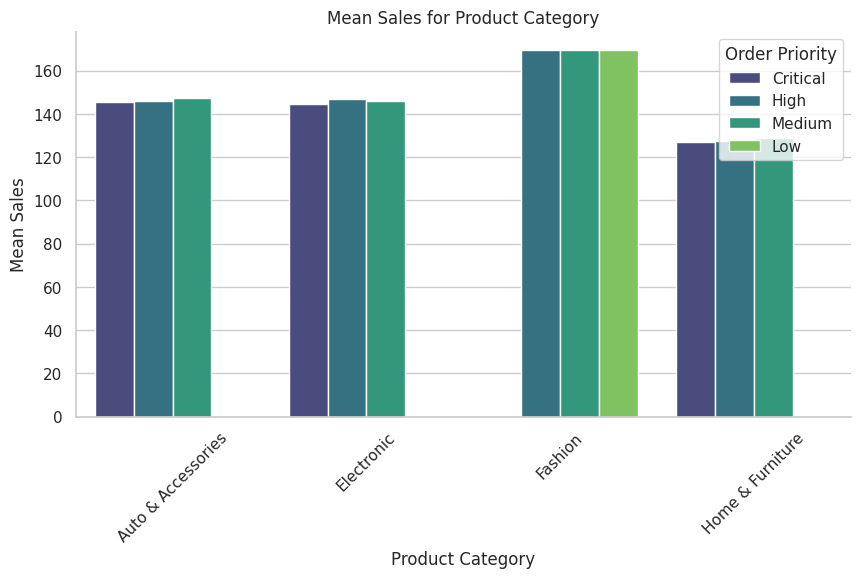

In [ ]:
mean_sales = df.groupby(['product_category', 'order_priority'])['sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='product_category', y='sales', hue='order_priority', data=mean_sales, palette='viridis')

ax.set_title('Mean Sales for Product Category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Mean Sales')

plt.legend(title='Order Priority')
plt.xticks(rotation=45)
sns.despine()

plt.show()

<div class="alert alert-info">
<p>

*   Order Priority from categories other than fashion have critical priority, while priority orders from fashion have low priority, unlike other priorities. From here we can assume that this factor has an influence on the number of standard class ship modes
</p>



</div>

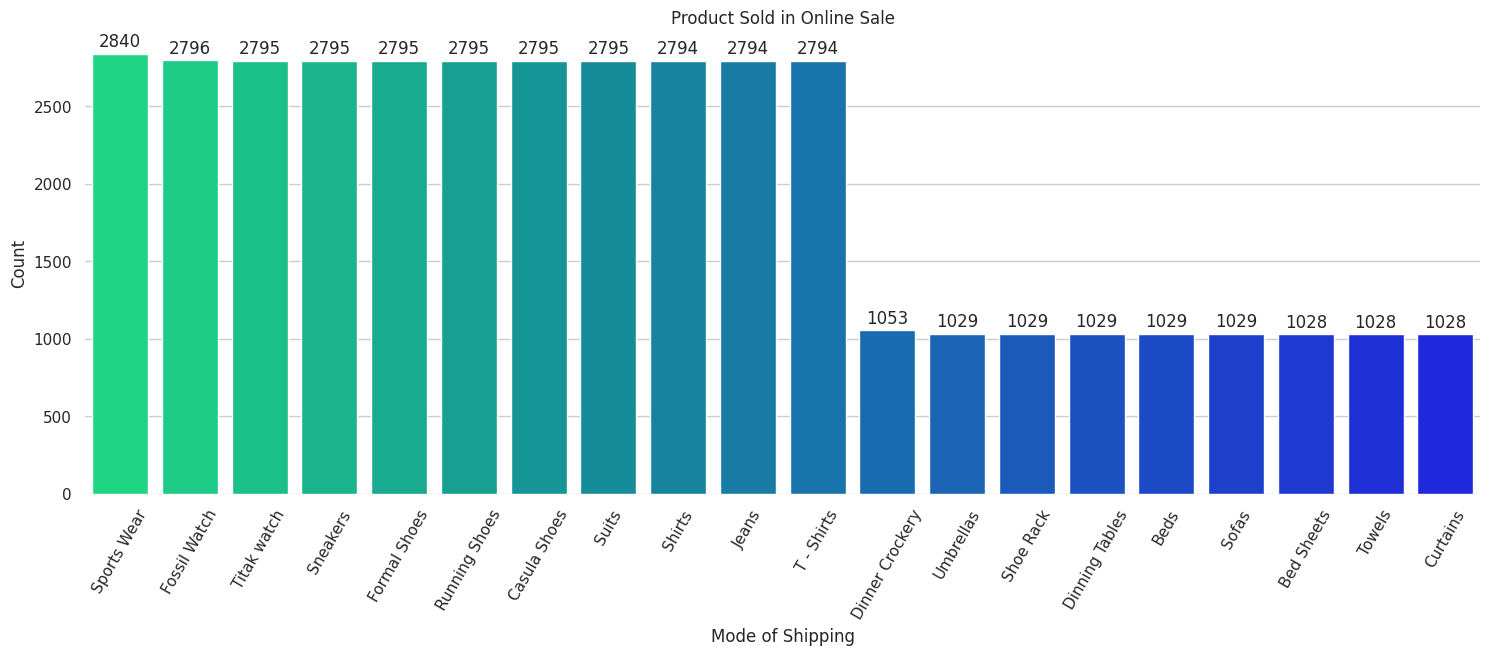

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
## Sort descending berdasarkan count ambil hanya 20 rows
df_prod=df['product'].value_counts().sort_values(ascending=False).to_frame()[:20]
ax=sns.barplot(data=df_prod,x=df_prod.index,y='product',palette="winter_r")
ax.set_title('Product Sold in Online Sale')

ax.set_xlabel('Mode of Shipping')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '1.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.show()

<div class="alert alert-info">
  <p>
Sportwear is the most popular among customers followed by Fossil Watch, Titak Watch, Sneakers, and Formal Shoes, Casula, Shoes, Shirts, Jeans, dan T-Shirts</p>
</div>

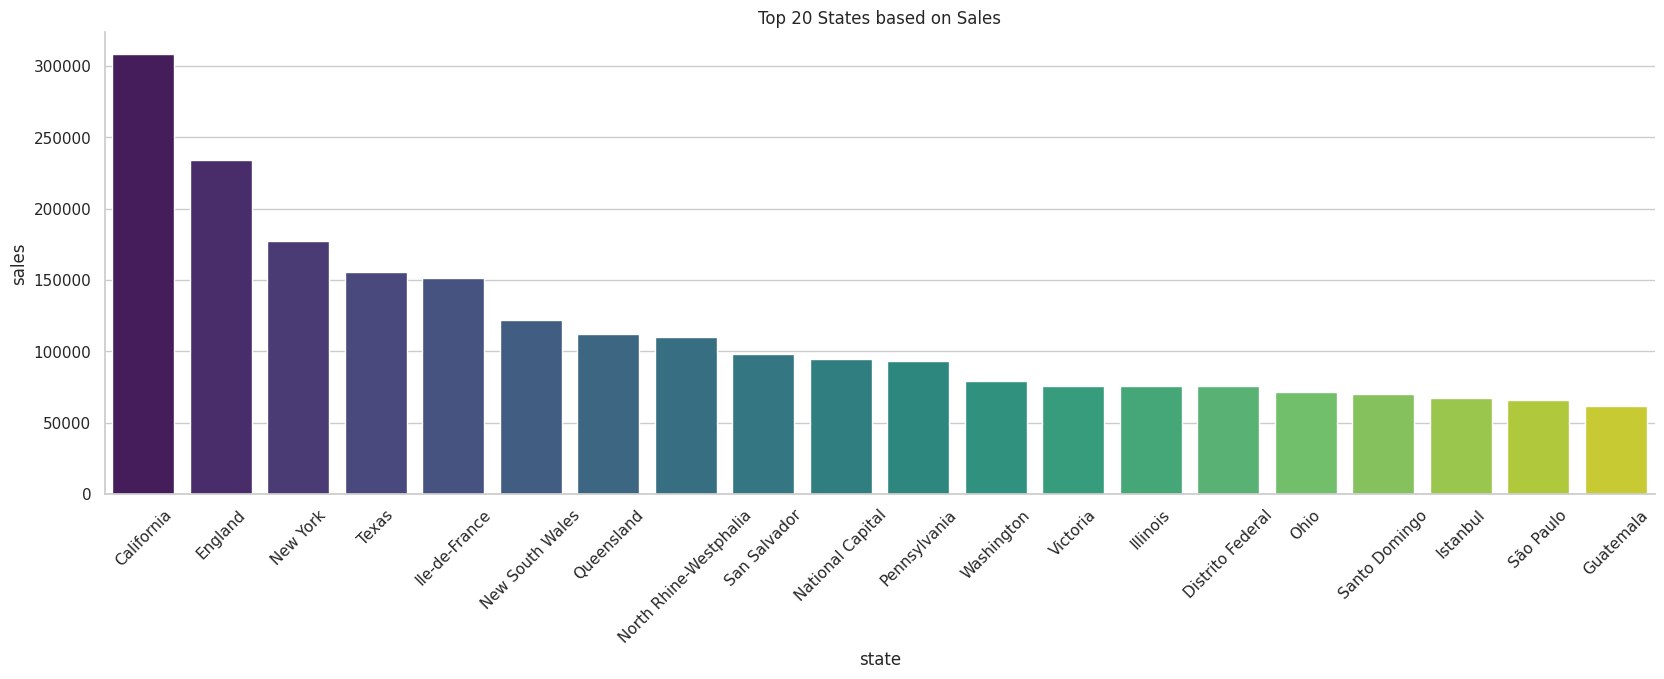

In [ ]:
grpcount = pd.DataFrame(df.groupby('state')['sales'].sum()).reset_index()
grpcount_ = grpcount.sort_values(by = 'sales', ascending = False)

top_20_states = grpcount_.iloc[:20]

plt.figure(figsize=(20, 6))
ax = sns.barplot(x='state', y='sales', data=top_20_states, palette='viridis')

ax.set_title('Top 20 States based on Sales')
plt.xticks(rotation=45)

sns.despine()

plt.show()

<div class="alert alert-info">
  <p>California is the state of origin of the most buyers, followed by England and New York</p>
</div>

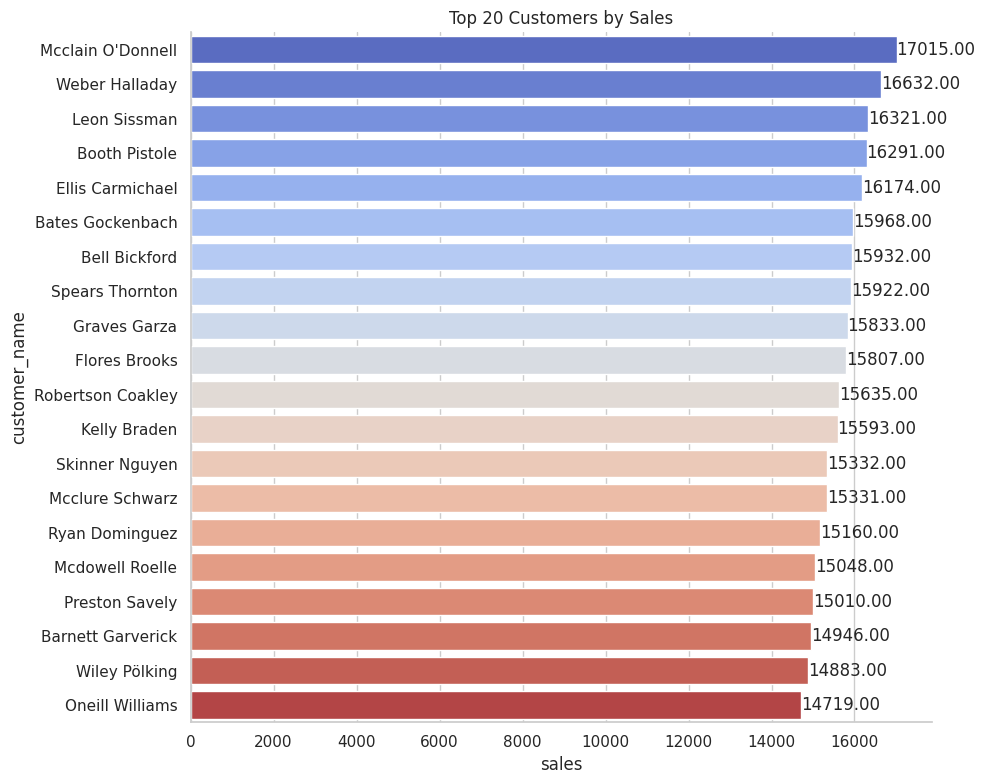

In [ ]:
grpcount = pd.DataFrame(df.groupby('customer_name')['sales'].sum()).reset_index()
grpcount_ = grpcount.sort_values(by = 'sales', ascending = False)

top_20_customers = grpcount_.iloc[:20]

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='sales', y='customer_name', data=top_20_customers, palette='coolwarm')

ax.set_title('Top 20 Customers by Sales')

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2.,
             '{:1.2f}'.format(width),
             ha='left', va='center')

plt.tight_layout()

sns.despine()

plt.show()

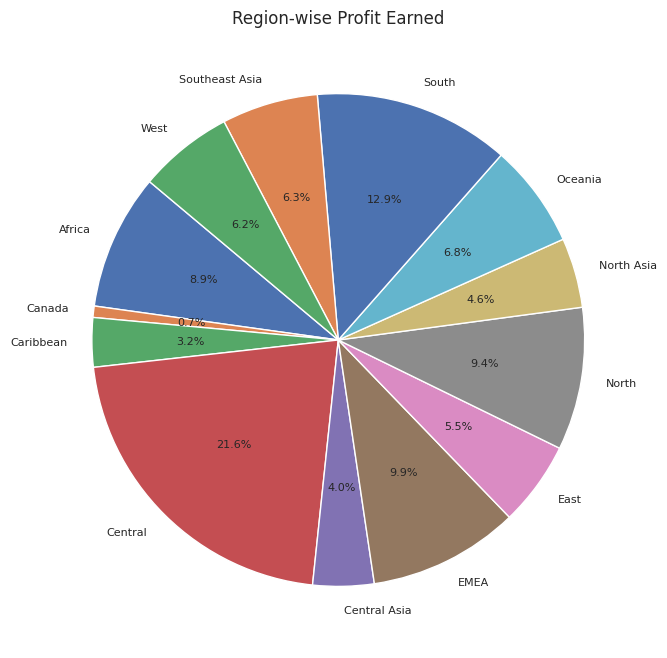

In [ ]:
region_profit = df.groupby('region')['profit'].sum().reset_index()
labels = region_profit['region']
sizes = region_profit['profit']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
plt.title('Region-wise Profit Earned')

plt.show()

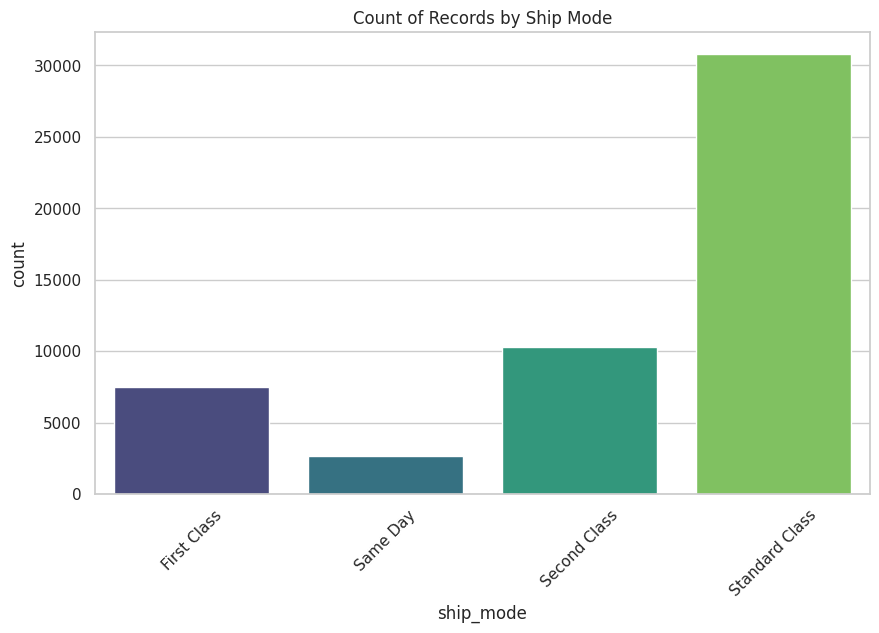

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ship_mode', data=df, palette='viridis')
ax.set_title('Count of Records by Ship Mode')
plt.xticks(rotation=45)

plt.show()

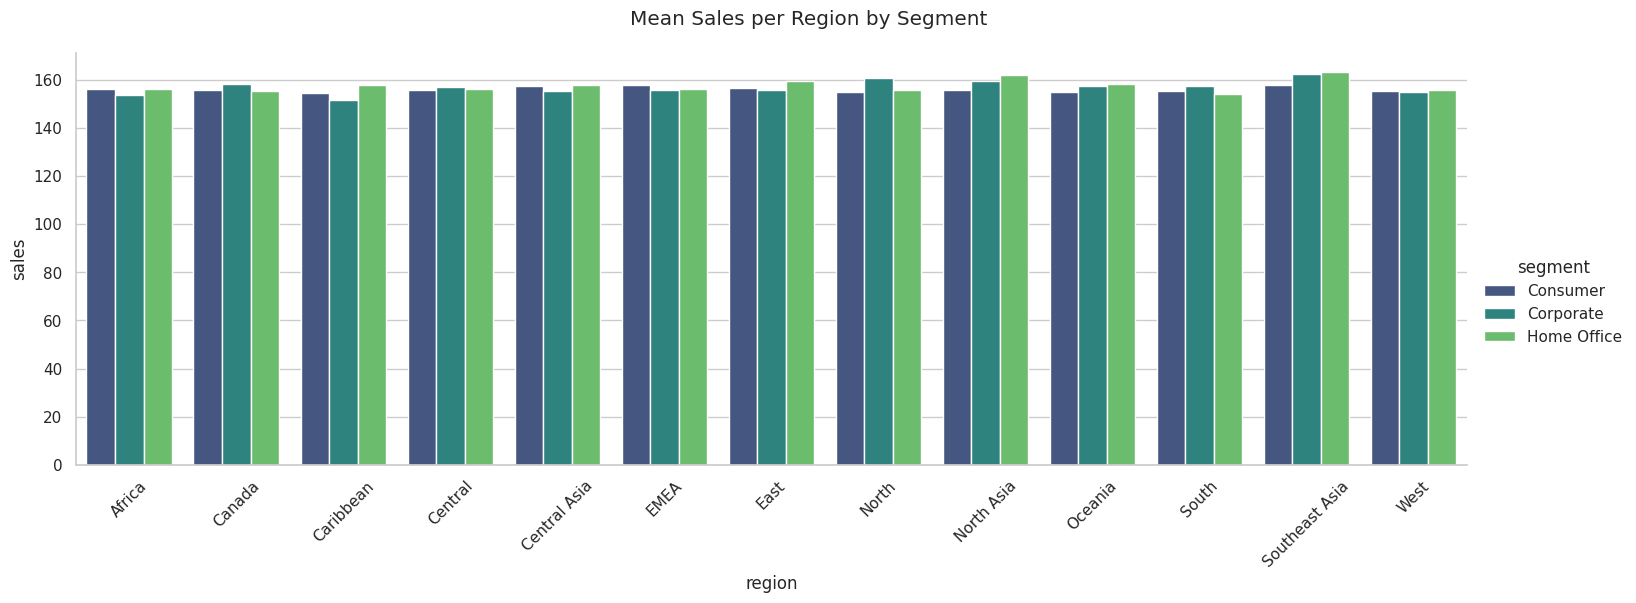

In [ ]:
mean_sales = df.groupby(['region', 'segment'])['sales'].mean().reset_index()

g = sns.catplot(x='region', y='sales', hue='segment', data=mean_sales, kind='bar', height=5, aspect=3, palette='viridis')
g.fig.suptitle('Mean Sales per Region by Segment', y=1.05)

plt.xticks(rotation=45)

plt.show()

In [ ]:
df.drop(df.index[321],inplace=True)
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])
df['quantity'] = pd.to_numeric(df['quantity'])


df['lapsdays'] = (df['ship_date'] - df['order_date']).dt.days

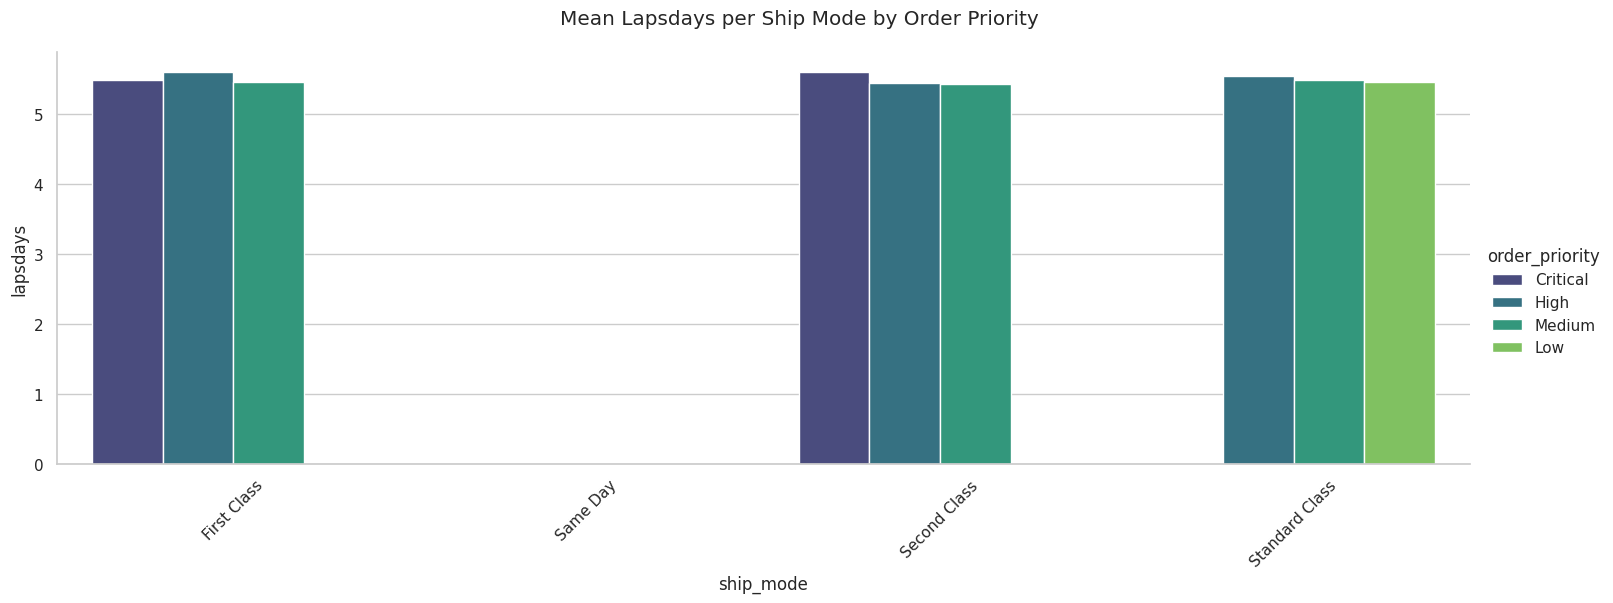

In [ ]:
mean_lapsdays = df.groupby(['ship_mode', 'order_priority'])['lapsdays'].mean().reset_index()
g = sns.catplot(x='ship_mode', y='lapsdays', hue='order_priority', data=mean_lapsdays,
                kind='bar', height=5, aspect=3, palette='viridis')
g.fig.suptitle('Mean Lapsdays per Ship Mode by Order Priority', y=1.05)

plt.xticks(rotation=45)

plt.show()

<div class="alert alert-info">
<p>

*   The Same Day shipments worked properly as it should
</p>



</div>

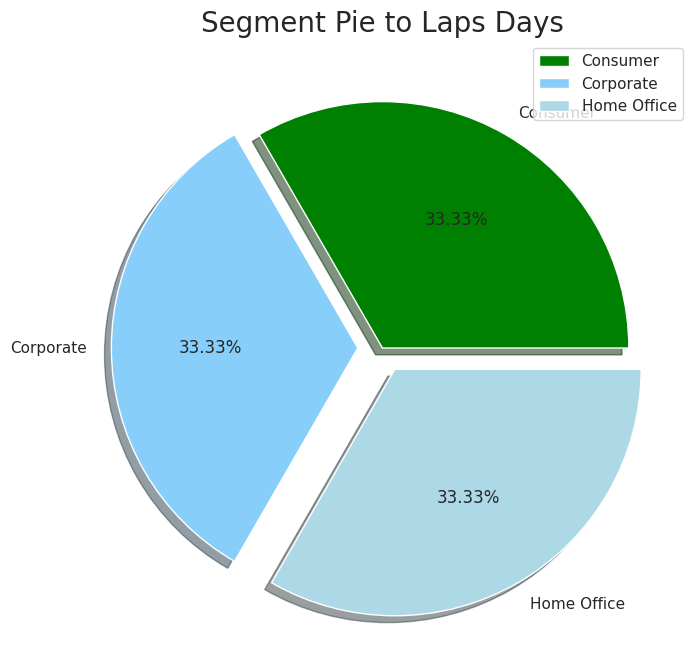

In [ ]:
grpcount = pd.DataFrame(df.groupby('segment')['lapsdays'].sum()).reset_index()
grpcount_ = grpcount.sort_values(by = 'lapsdays', ascending = False)

labels = ['Consumer', 'Corporate','Home Office']
size = grpcount_['segment'].value_counts()
colors = ['green', 'lightskyblue','lightblue']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Segment Pie to Laps Days', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

<div class="alert alert-info">
  <p>...............</p>
</div>

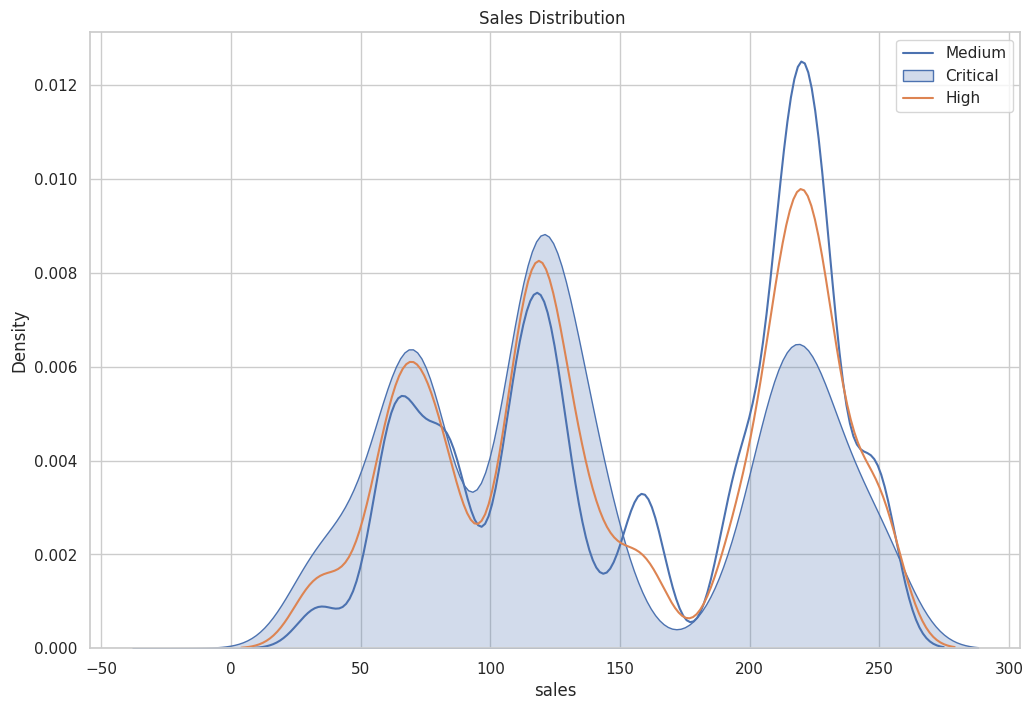

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['sales'][df.order_priority == 'Medium'], shade=False)
sns.kdeplot(df['sales'][df.order_priority == 'Critical'], shade=True)
sns.kdeplot(df['sales'][df.order_priority == 'High'], shade=False)
plt.legend(['Medium', 'Critical','High'])
plt.title('Sales Distribution ')
plt.show()

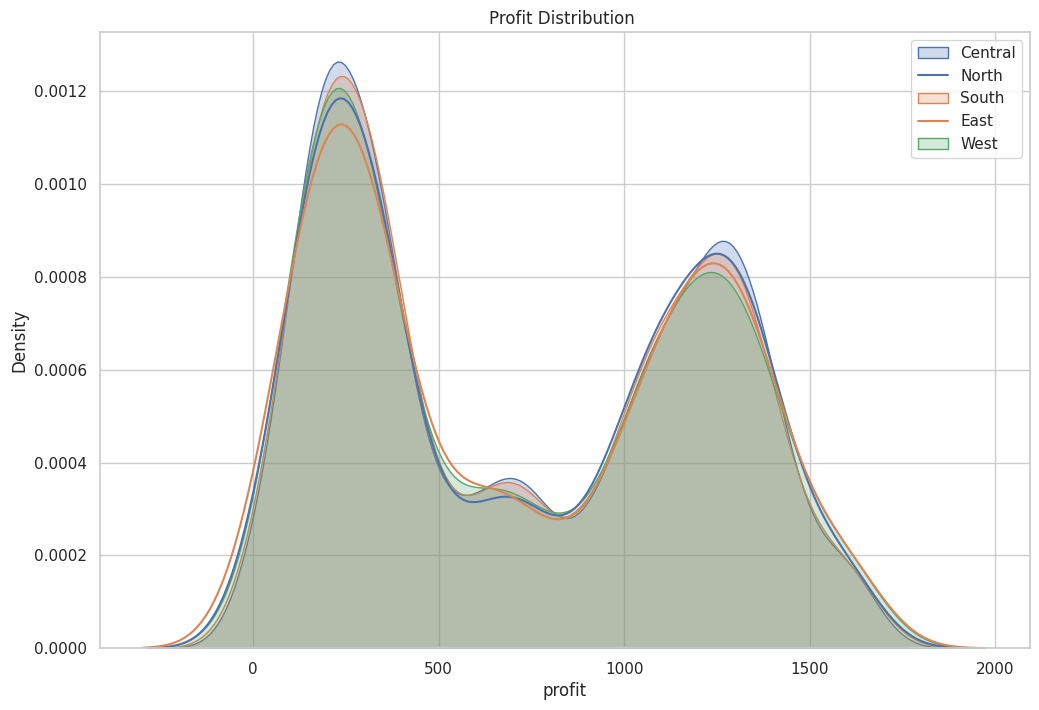

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['profit'][df.region == 'Central'], shade=True)
sns.kdeplot(df['profit'][df.region == 'North'], shade=False)
sns.kdeplot(df['profit'][df.region == 'South'], shade=True)
sns.kdeplot(df['profit'][df.region == 'East'], shade=False)
sns.kdeplot(df['profit'][df.region == 'West'], shade=True)

plt.legend(['Central', 'North','South','East','West'])
plt.title('Profit Distribution ')
plt.show()

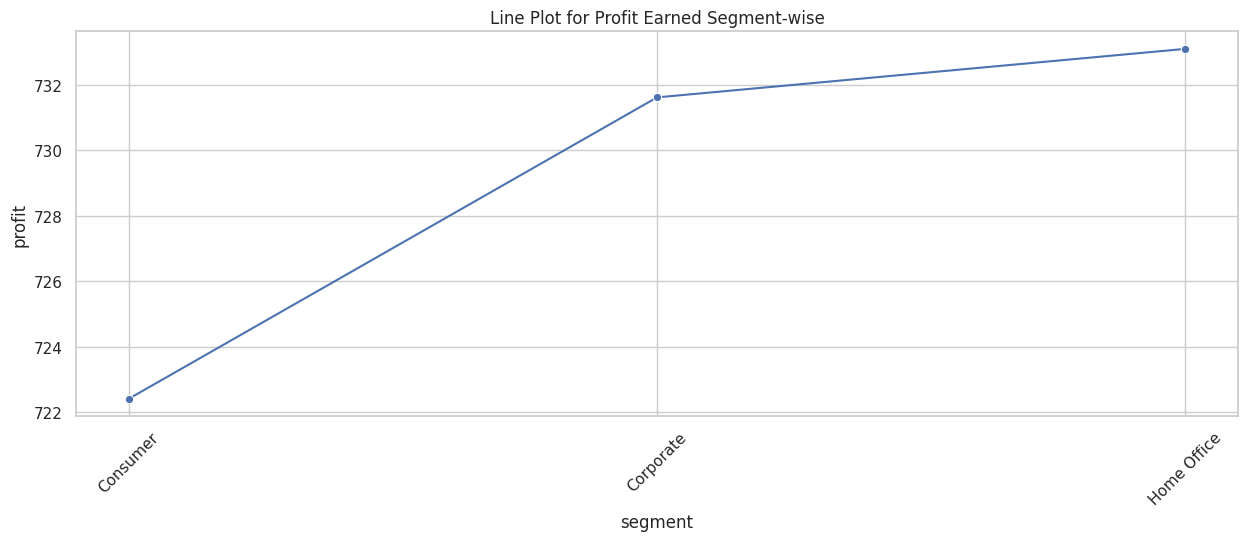

In [ ]:
mean_profit = df.groupby('segment')['profit'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='segment', y='profit', data=mean_profit, marker='o')

ax.set_title('Line Plot for Profit Earned Segment-wise')
plt.xticks(rotation=45)

plt.show()

<div class="alert alert-info">
  <p></p>

*   Consumer as personal is the lowes. According my assumption logically individual buyers bought less than Corporate and Home Office
</p>

</div



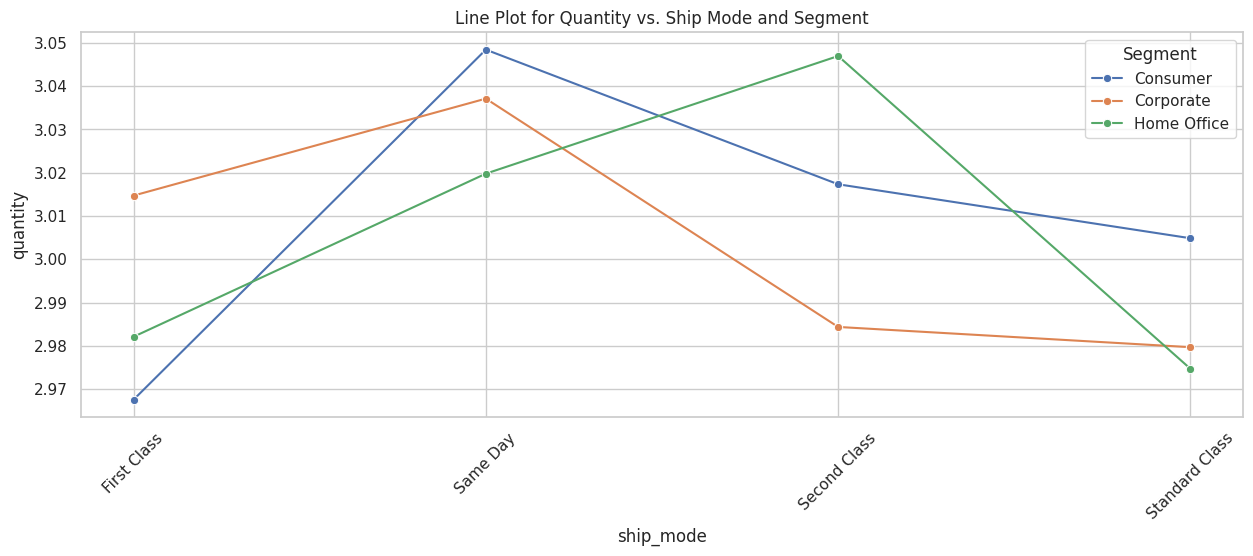

In [ ]:
mean_quantity = df.groupby(['ship_mode', 'segment'])['quantity'].mean().reset_index()

plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='ship_mode', y='quantity', hue='segment', data=mean_quantity, marker='o')

ax.set_title('Line Plot for Quantity vs. Ship Mode and Segment')
plt.legend(title='Segment')
plt.xticks(rotation=45)

plt.show()

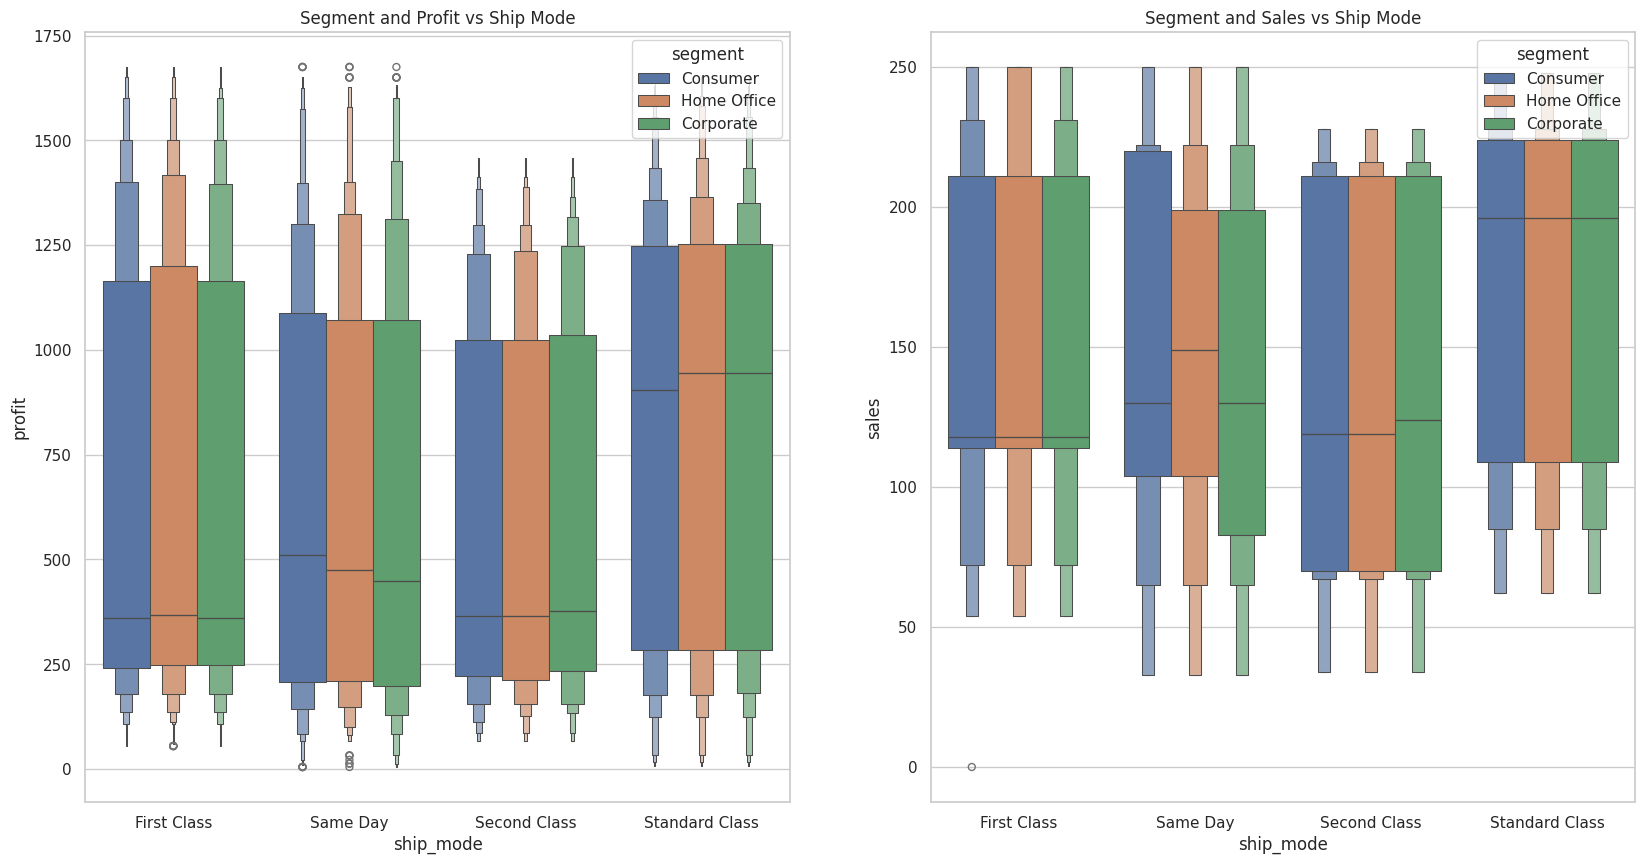

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.boxenplot(x="ship_mode", y="profit", hue="segment", data=df, ax=ax[0])
ax[0].set_title('Segment and Profit vs Ship Mode')

sns.boxenplot(x="ship_mode", y="sales", hue="segment", data=df, ax=ax[1])
ax[1].set_title('Segment and Sales vs Ship Mode')

plt.show()

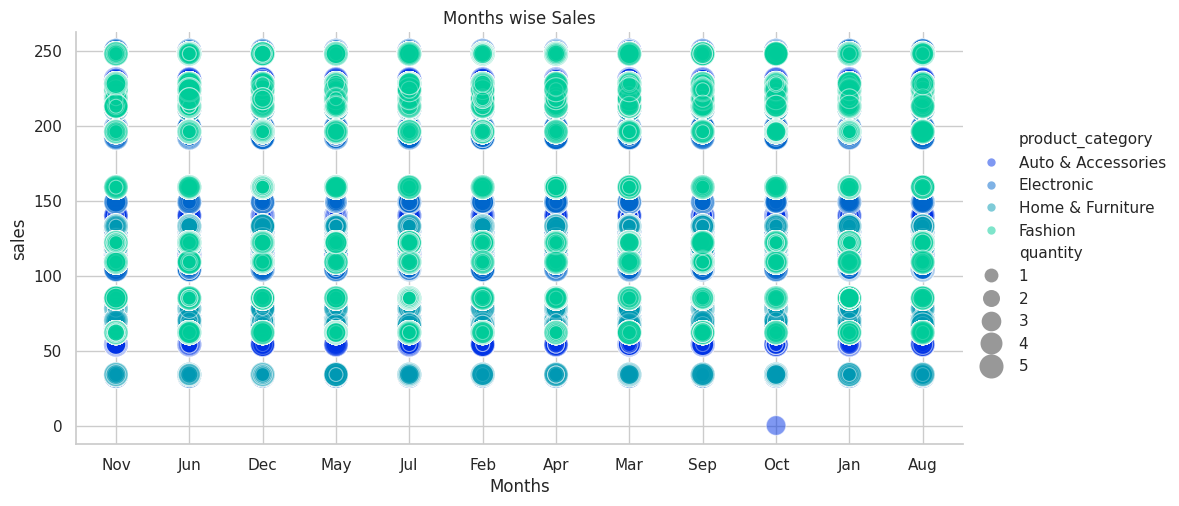

In [ ]:
axes = sns.relplot(x="months", y="sales", hue="product_category",
                size="quantity", data=df,palette='winter', sizes=(100, 300),alpha=0.5,aspect=2)
axes.set(xlabel='Months',title="Months wise Sales")

axes.set_xticklabels()

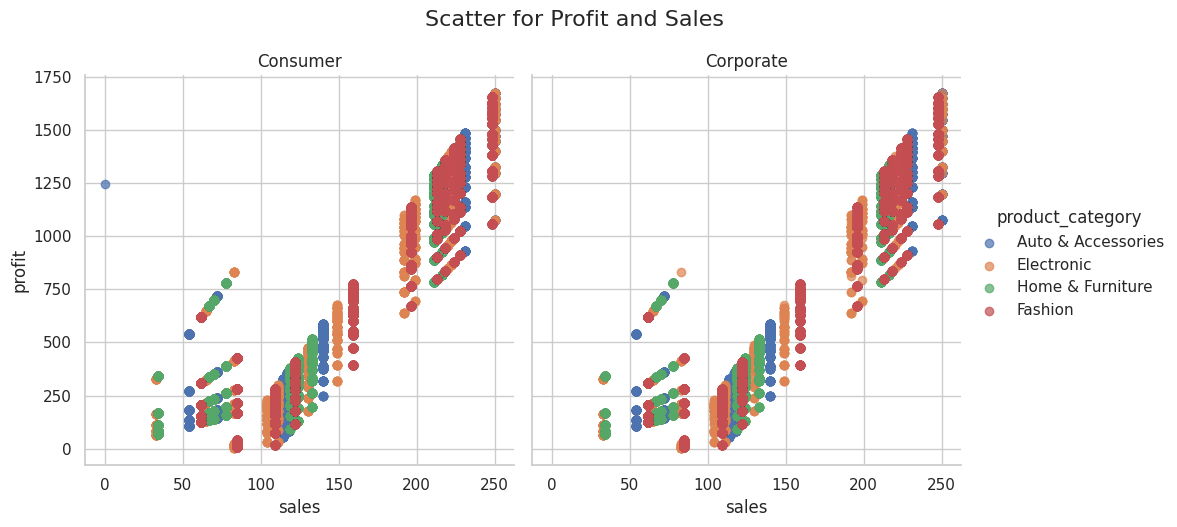

In [ ]:
# dxp.scatter(x='sales', y='profit', data=df, split='product_category', col='segment', col_order=['Consumer','Corporate'],title = 'Scatter for Profit and Sales')

g = sns.FacetGrid(df, col='segment', col_order=['Consumer', 'Corporate'], hue='product_category', height=5, aspect=1)
g.map(plt.scatter, 'sales', 'profit', alpha=.7)
g.add_legend()

g.set_titles('{col_name}')
g.fig.suptitle('Scatter for Profit and Sales', fontsize=16, y=1.05)

plt.show()

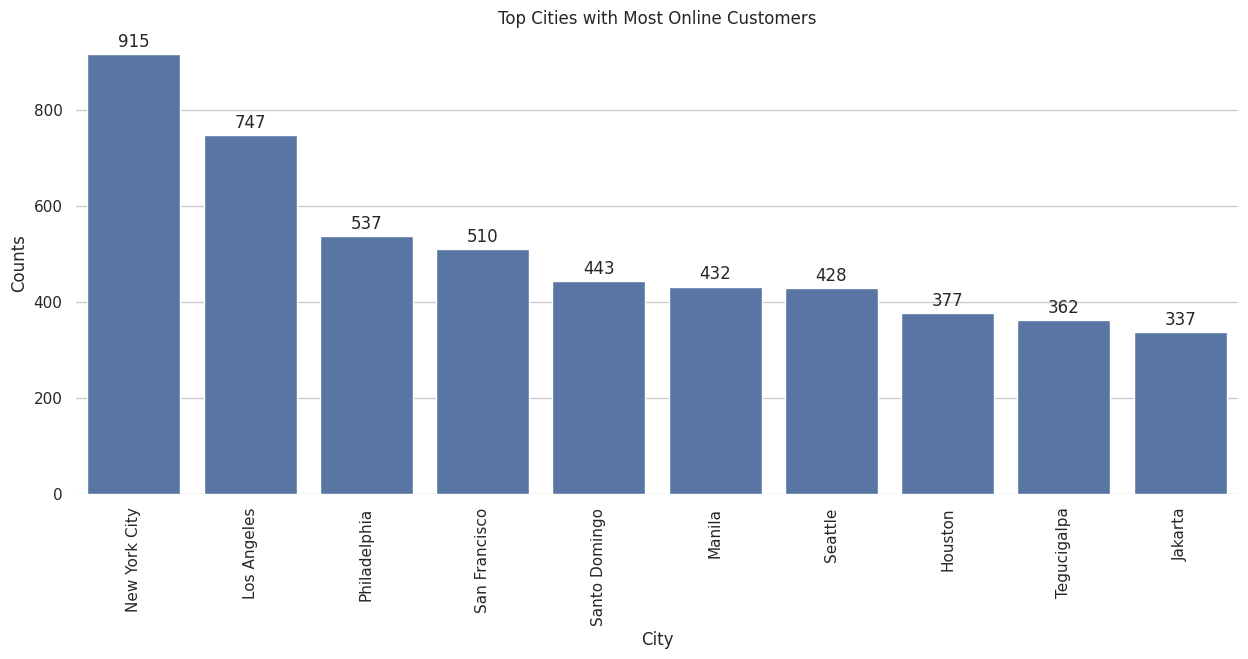

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
XP=df.city.value_counts().sort_values(ascending=False).to_frame()[:10]
ax=sns.barplot(data=XP,x=XP.index,y='city')
ax.set_title('Top Cities with Most Online Customers')

ax.set_xlabel('City')
ax.set_ylabel('Counts')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '1.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Analysis

1. What are the sales trends in the Asian continent from year to year?
2. Which countries have the potential to generate the largest profits after first place?
3. Who are the 5 buyers who buy the most (Count) from this data?
4. Based on the average between regions, what product category is the most popular?
5. To achieve maximum profit, what items should the store stock more in the future?

## **1. Asia Sales Trend**

In [ ]:
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,order_priority,customer_id,customer_name,segment,city,state,country,region,months,lapsdays
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,140.0,2,0.05,...,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov,8
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,211.0,3,0.03,...,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun,2
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,117.0,5,0.01,...,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec,8
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,118.0,2,0.05,...,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May,7
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,250.0,1,0.04,...,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul,9


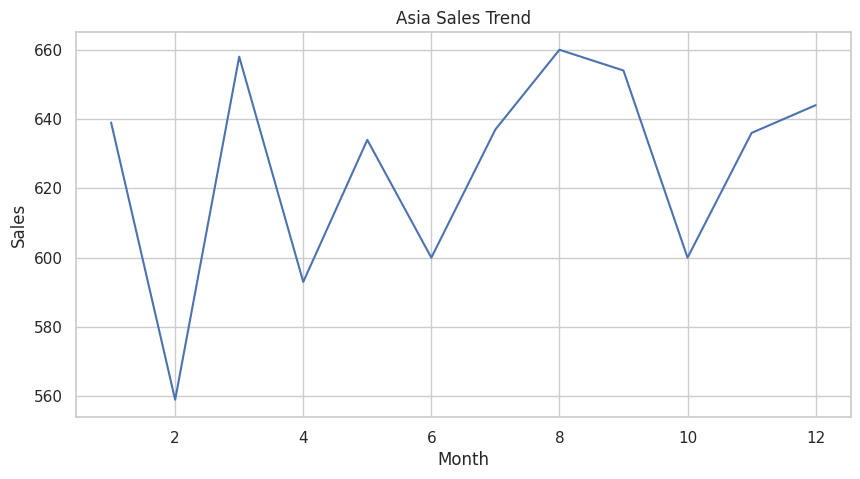

In [ ]:
asia_sales = df[df['region'].isin(['Central Asia', 'North Asia','Southeast Asia'])]

asia_sales['month'] = asia_sales['order_date'].dt.month
plt.figure(figsize=(10, 5))
sales_by_month = asia_sales.groupby('month').size().reset_index(name='total_sales')
sns.lineplot(data=sales_by_month, x="month", y="total_sales")
plt.title('Asia Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

<div class="alert alert-info">
<p>

*  February is the worse sales record in Asia
</p>

## **2. Most Potential Country by Profit**


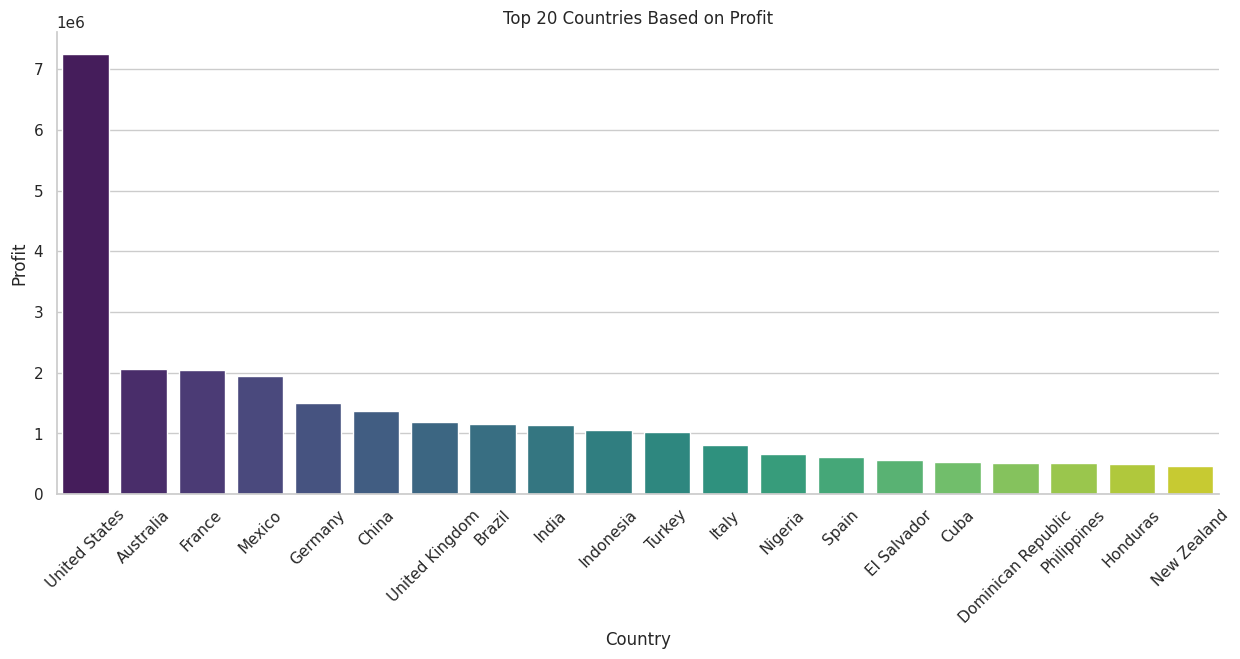

In [ ]:
grpcount = pd.DataFrame(df.groupby('country')['profit'].sum()).reset_index()
grpcount_ = grpcount.sort_values(by = 'profit', ascending = False)

top_20_countries = grpcount_.iloc[:20]

plt.figure(figsize=(15, 6))
ax = sns.barplot(x='country', y='profit', data=top_20_countries, palette='viridis')

ax.set_title('Top 20 Countries Based on Profit')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.xticks(rotation=45)

sns.despine()

plt.show()

<div class="alert alert-info">
<p>

*   Australia, France and Mexico statically have almost the same opportunities. But like the United States, France is part of G7 and has a strong economy, stronger than Australia and Mexico. So according to my assumption, France has the biggest opportunity
</p>

## **3. Top 5 Repeat Order Buyyers**

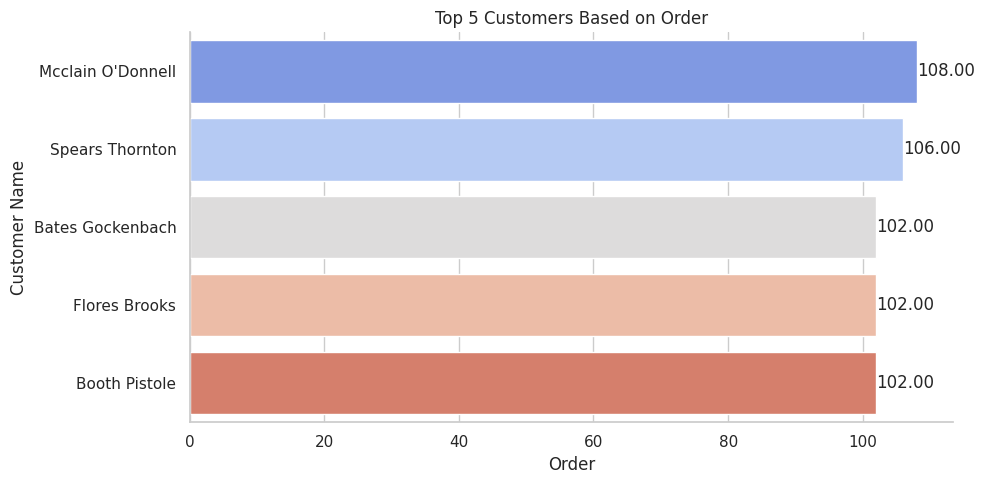

In [ ]:
grpcount = pd.DataFrame(df.groupby('customer_name')['order_id'].count()).reset_index()
grpcount_ = grpcount.sort_values(by = 'order_id', ascending = False)

top_20_customers = grpcount_.iloc[:5]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='order_id', y='customer_name', data=top_20_customers, palette='coolwarm')
ax.set_title('Top 5 Customers Based on Order')
plt.xlabel('Order')
plt.ylabel('Customer Name')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2.,
             '{:1.2f}'.format(width),
             ha='left', va='center')
plt.tight_layout()
sns.despine()
plt.show()

<div class="alert alert-info">
<p>

*   The difference in top 5 repeat order is very tiny


</p>

## **4. Mean Most Favorit Product Category Based On Region**

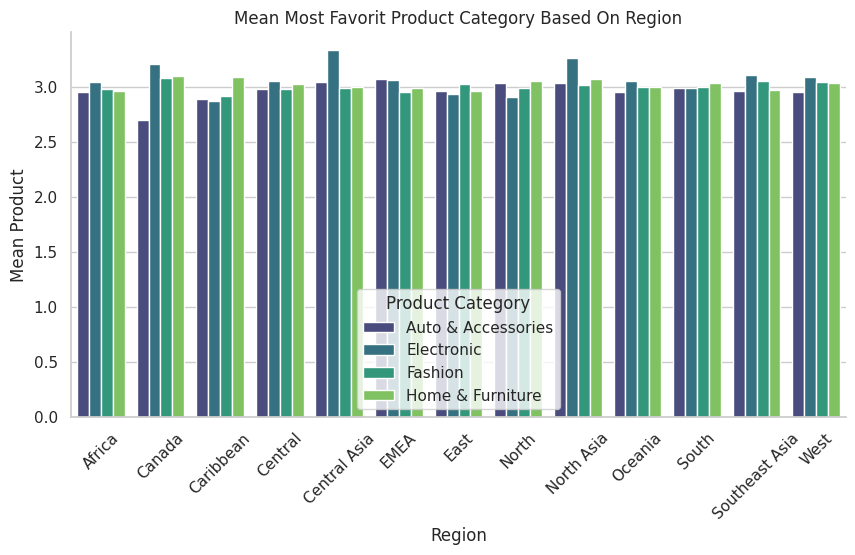

In [ ]:
mean_product_category = df.groupby(['region', 'product_category'])['quantity'].mean().reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='region', y='quantity', hue='product_category', data=mean_product_category, palette='viridis')

ax.set_title('Mean Most Favorit Product Category Based On Region')
ax.set_xlabel('Region')
ax.set_ylabel('Mean Product')

plt.legend(title='Product Category')

plt.xticks(rotation=45)

sns.despine()

plt.show()

<div class="alert alert-info">
<p>


*   In Central Asia, North Asia, and Canada Region, electronic is significantly the top product category among the other

</p>

## **5. Top max profit products**

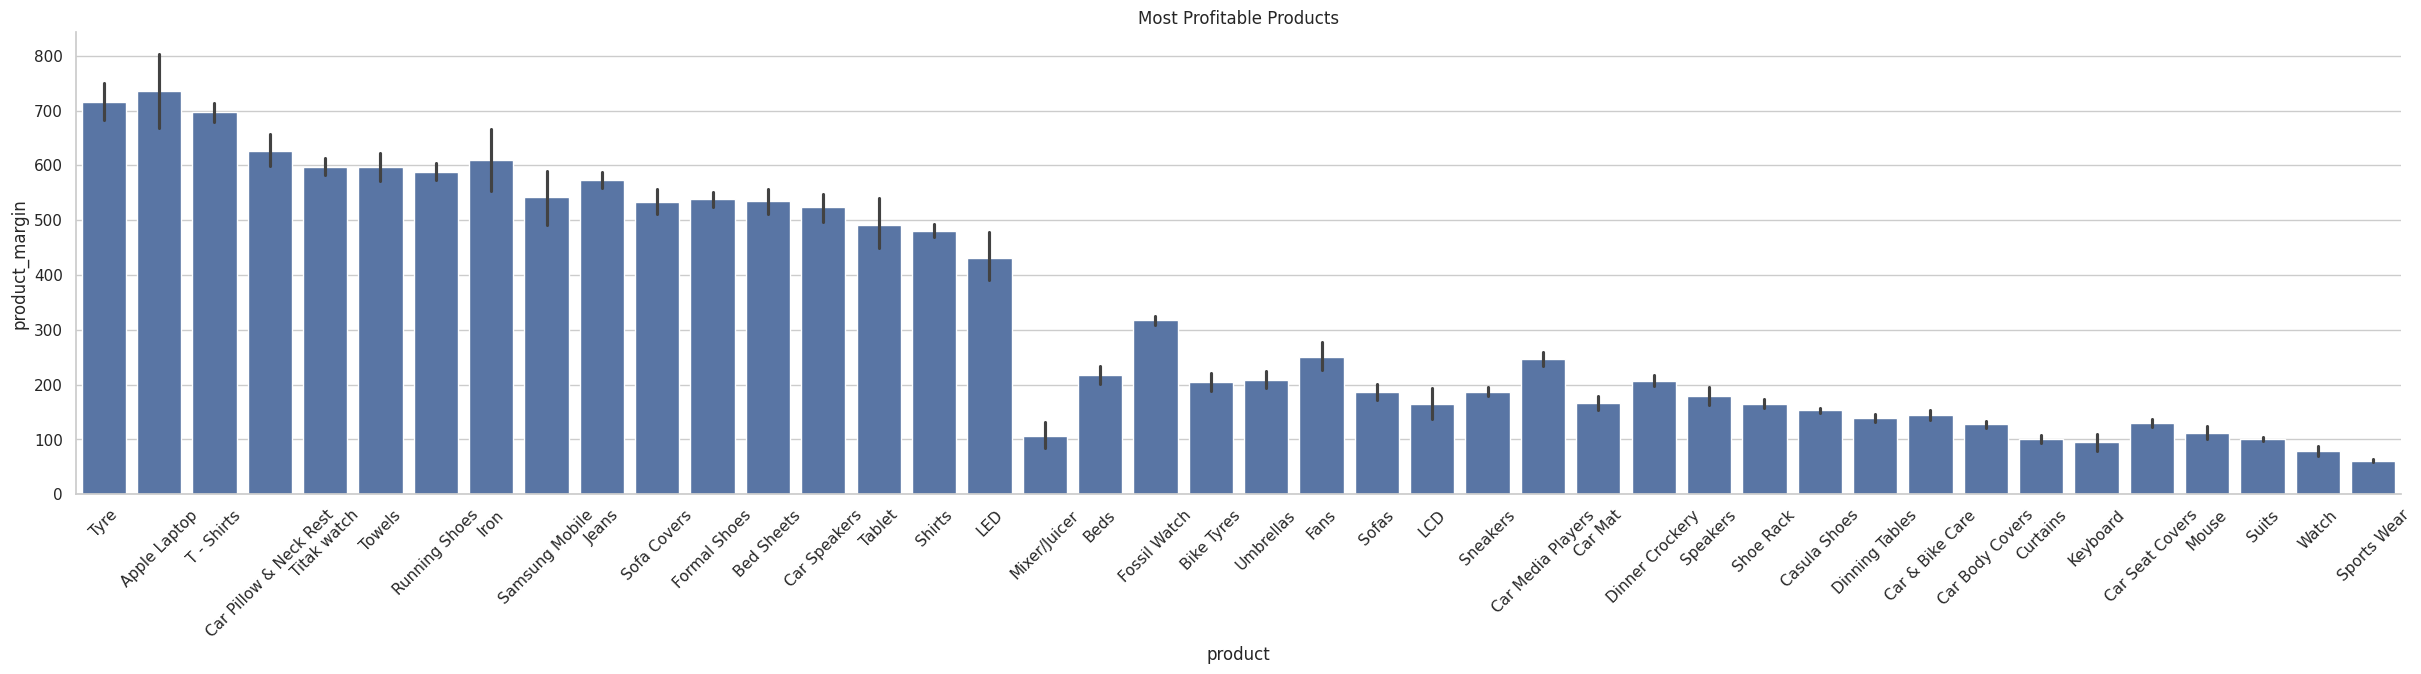

In [ ]:
df['product_margin'] = df['profit'] / df['quantity']

df_sorted = df.sort_values(by='product_margin', ascending=False)

plt.figure(figsize=(30, 6))
ax = sns.barplot(x='product', y='product_margin', data=df_sorted)

ax.set_title('Most Profitable Products')
plt.xticks(rotation=45)
ax.set_xlabel('Product')
ax.set_ylabel('Product Margin')
sns.despine()

plt.show()

#top_10 = df_sorted.iloc[:10] (saya tidak tahu ada masalah saat menggunakan iloc atau .head() untuk mencari top 10)


<div class="alert alert-info">
<p>

*   To maximize the profit, The store has to stock up Tyre, Apple Laptop, T-Shirts products


</p>

In [ ]:
df.to_excel("dataset_ecommerce_cleaned.xlsx")